<a href="https://colab.research.google.com/github/VidhyaSree-N/classifier_synthetic_original_mammograms/blob/main/Classifierwith512_512data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#
# 1. Load Data
#
DATAFOLDER = '/content/drive/MyDrive/512data'


In [ ]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_train = train_generator.flow_from_directory(DATAFOLDER+'/train',
                                              color_mode='grayscale',
                                              target_size=(100,100))

Found 202 images belonging to 2 classes.


In [ ]:
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_test = test_generator.flow_from_directory(DATAFOLDER+'/test',
                                            color_mode='grayscale',
                                            target_size=(100,100))

Found 200 images belonging to 1 classes.


In [ ]:
first_image = X_train[0][0][0]
first_label = X_train[0][1][0]

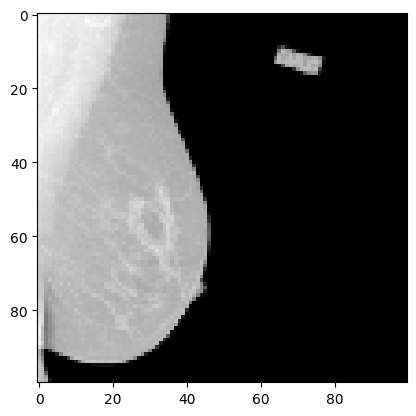

In [ ]:
imshow(first_image[:,:,0], cmap='gray')

In [ ]:
first_label

array([0., 1.], dtype=float32)

In [ ]:
first_image.max()

0.98823535

In [ ]:
first_image.shape

(100, 100, 1)

In [ ]:
NUMBER_OF_CLASSES = 2

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                             activation='relu',
                             input_shape=first_image.shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(NUMBER_OF_CLASSES, activation='softmax'))


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
# model.fit_generator(X_train, epochs=30, steps_per_epoch=32)
model.fit_generator(X_train, epochs=7)

<ipython-input-13-892ea5624cad>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(X_train, epochs=7)


Epoch 1/7
7/7 [==============================] - 33s 4s/step - loss: 0.7014 - accuracy: 0.5050
Epoch 2/7
7/7 [==============================] - 12s 1s/step - loss: 0.6709 - accuracy: 0.6485
Epoch 3/7
7/7 [==============================] - 13s 2s/step - loss: 0.6591 - accuracy: 0.7228
Epoch 4/7
7/7 [==============================] - 11s 2s/step - loss: 0.6263 - accuracy: 0.8168
Epoch 5/7
7/7 [==============================] - 12s 2s/step - loss: 0.5935 - accuracy: 0.9109
Epoch 6/7
7/7 [==============================] - 11s 1s/step - loss: 0.5817 - accuracy: 0.9158
Epoch 7/7
7/7 [==============================] - 12s 2s/step - loss: 0.5693 - accuracy: 0.9059


In [ ]:
prediction = model.predict(X_test[0][0][5:6])

1/1 [==============================] - 0s 63ms/step


In [ ]:
prediction

array([[0.4025055 , 0.59749454]], dtype=float32)

In [ ]:
np.argmax( prediction )

1

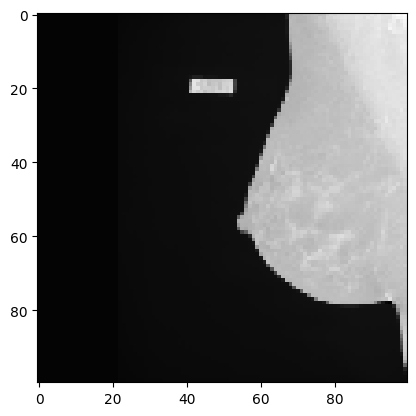

In [ ]:
imshow(X_test[0][0][5,:,:,0], cmap='gray')

In [ ]:
model.evaluate(X_test)

7/7 [==============================] - 48s 8s/step - loss: 1.4241 - accuracy: 0.5300


[1.424128532409668, 0.5299999713897705]

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
prediction2 = model.predict(X_test[0][0][3:4])

1/1 [==============================] - 0s 43ms/step


In [ ]:
prediction2

array([[0.4870413, 0.5129587]], dtype=float32)

In [ ]:
np.argmax( prediction2 )

1

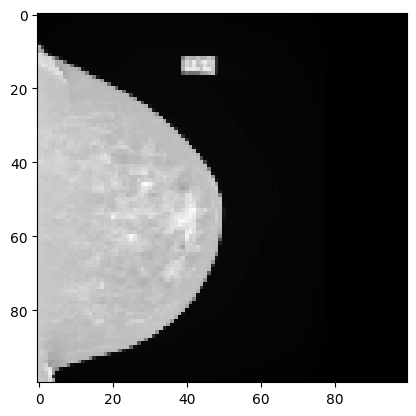

In [ ]:
imshow(X_test[0][0][3,:,:,0], cmap='gray')

In [ ]:
model.evaluate(X_test)

7/7 [==============================] - 3s 363ms/step - loss: 1.4241 - accuracy: 0.5300


[1.424128770828247, 0.5299999713897705]

In [ ]:
prediction3 = model.predict(X_test[0][0][20:21])

1/1 [==============================] - 0s 35ms/step


In [ ]:
prediction3

array([[0.6348581 , 0.36514193]], dtype=float32)

In [ ]:
np.argmax( prediction3 )

0

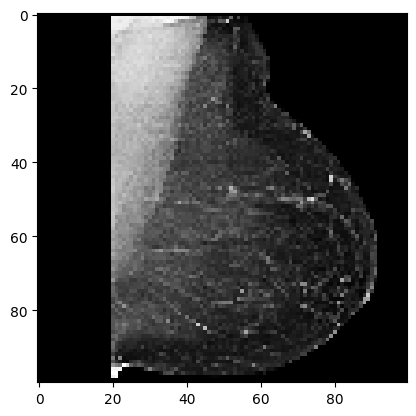

In [ ]:
imshow(X_test[0][0][20,:,:,0], cmap='gray')